In [8]:
#installing uci repo
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [9]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo

In [10]:
# Fetching the Heart Disease Dataset (ID 45)
heart_disease = fetch_ucirepo(id=45)

# Data (features and target)
X = heart_disease.data.features
y = heart_disease.data.targets

# Displaying Metadata and Variables Information
print(heart_disease.metadata)
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [20]:
# 1. Data Preprocessing
# Handle Missing Values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Normalize Numerical Features
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

# 3. Encoding the Target Variable
y_encoded = encoder.fit_transform(y.values.ravel())  # Ensure that y is 1D

# 4. Flatten the target variable to a 1D array (if it's 2D)
y_encoded = y_encoded.ravel()  # This flattens the target to a 1D array

# Final Preprocessed Dataset
X_normalized.head(), y_encoded[:5]



(        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
 0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
 1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
 2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
 3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
 4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   
 
     oldpeak  slope        ca  thal  
 0  0.370968    1.0  0.000000  0.75  
 1  0.241935    0.5  1.000000  0.00  
 2  0.419355    0.5  0.666667  1.00  
 3  0.564516    1.0  0.000000  0.00  
 4  0.225806    0.0  0.000000  0.00  ,
 array([0, 2, 1, 0, 0], dtype=int64))

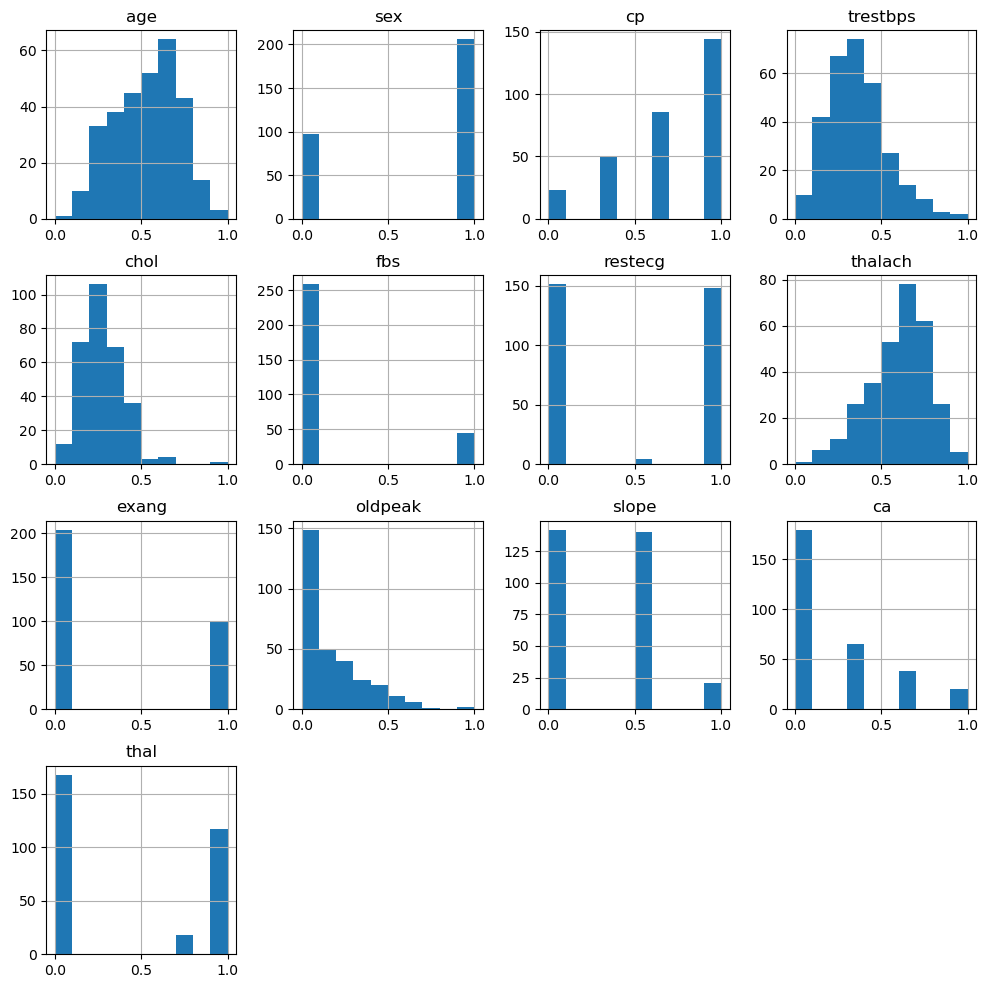

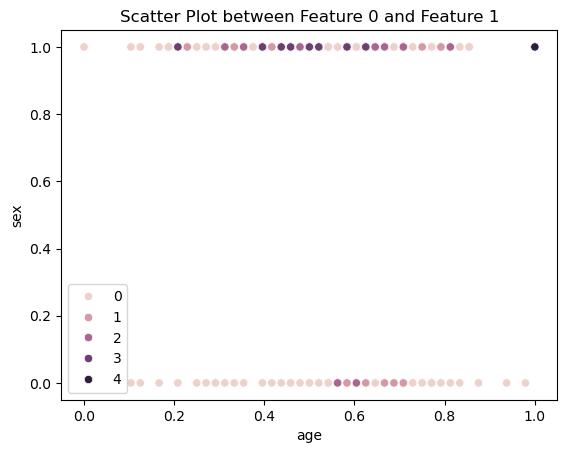

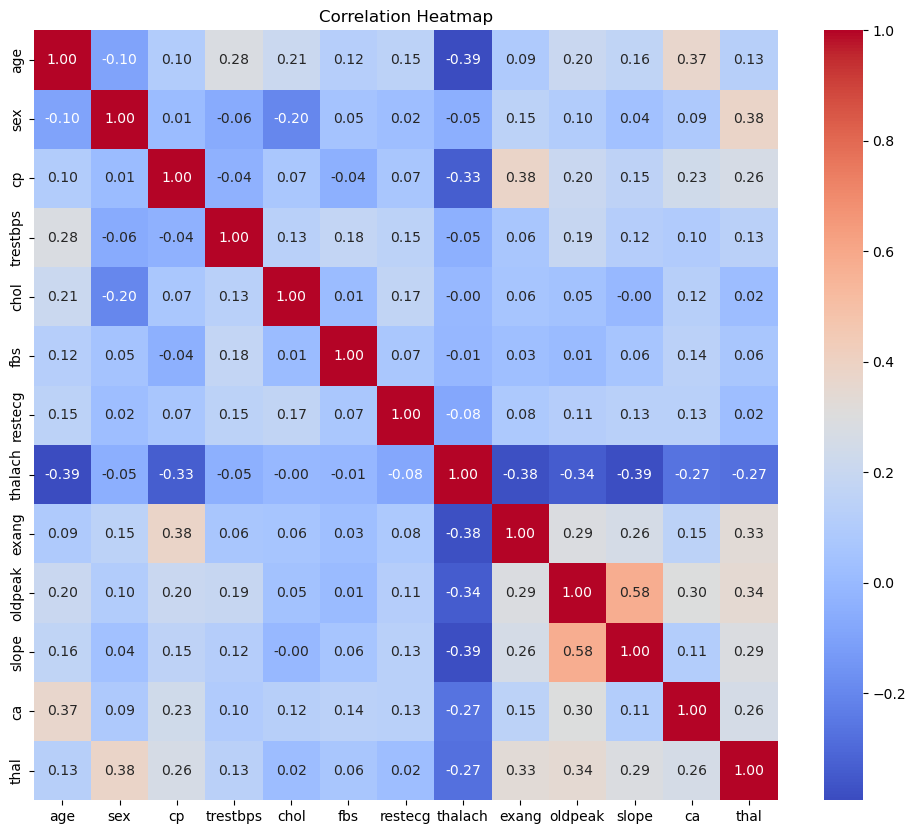

In [21]:
# 2. Exploratory Data Analysis (EDA)
# Feature Distributions (Histograms)
X_normalized.hist(bins=10, figsize=(12, 12))
plt.show()

# Scatter Plot between Features (Example: First two features)
sns.scatterplot(x=X_normalized.iloc[:, 0], y=X_normalized.iloc[:, 1], hue=y_encoded)
plt.title("Scatter Plot between Feature 0 and Feature 1")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X_normalized.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [22]:
# 3. Model Training and Evaluation
# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.3, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [23]:
# 4. Model Evaluation Function
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision (macro average): {precision_score(y_test, y_pred, average='macro', zero_division=1):.2f}")
    print(f"Recall (macro average): {recall_score(y_test, y_pred, average='macro', zero_division=1):.2f}")
    print(f"F1-score (macro average): {f1_score(y_test, y_pred, average='macro', zero_division=1):.2f}")
    print("\n")


# Evaluate all models
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("SVM", y_test, svm_preds)

Logistic Regression Evaluation:
Accuracy: 0.56
Precision (macro average): 0.49
Recall (macro average): 0.29
F1-score (macro average): 0.29


Random Forest Evaluation:
Accuracy: 0.55
Precision (macro average): 0.47
Recall (macro average): 0.27
F1-score (macro average): 0.26


SVM Evaluation:
Accuracy: 0.56
Precision (macro average): 0.46
Recall (macro average): 0.30
F1-score (macro average): 0.27




                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.560440   0.557169  0.560440  0.531471
1        Random Forest  0.549451   0.517111  0.549451  0.503449
2                  SVM  0.560440   0.522337  0.560440  0.513571


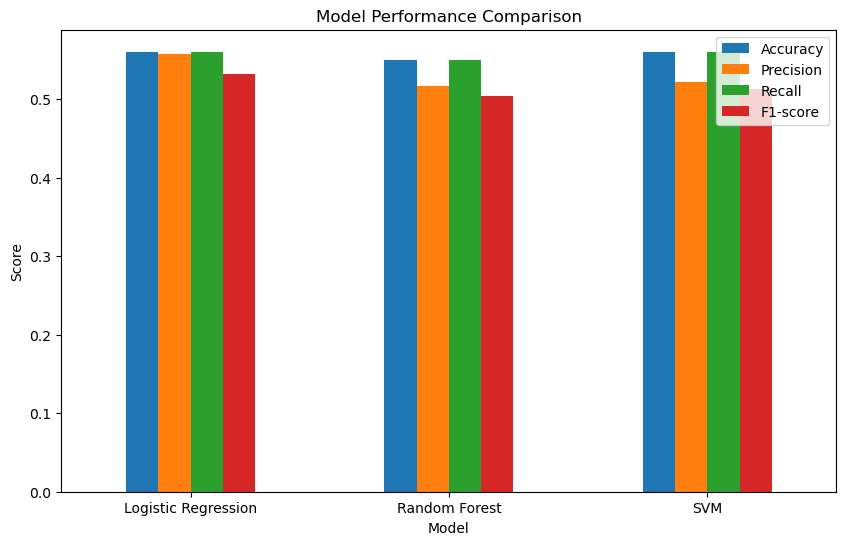

In [27]:
#5 Model Evaluation
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, lr_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, svm_preds)
    ],
    'Precision': [
        precision_score(y_test, lr_preds, average='weighted', zero_division=1),
        precision_score(y_test, rf_preds, average='weighted', zero_division=1),
        precision_score(y_test, svm_preds, average='weighted', zero_division=1)
    ],
    'Recall': [
        recall_score(y_test, lr_preds, average='weighted', zero_division=1),
        recall_score(y_test, rf_preds, average='weighted', zero_division=1),
        recall_score(y_test, svm_preds, average='weighted', zero_division=1)
    ],
    'F1-score': [
        f1_score(y_test, lr_preds, average='weighted', zero_division=1),
        f1_score(y_test, rf_preds, average='weighted', zero_division=1),
        f1_score(y_test, svm_preds, average='weighted', zero_division=1)
    ]
}

# Creating a DataFrame for the model comparison
results_df = pd.DataFrame(results)

# Displaying the results
print(results_df)

# Visualizing the Comparison (Bar Plot for each metric)
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.show()


Model Performance Overview

    Logistic Regression:
        Accuracy: 0.5604
        Precision: 0.5572
        Recall: 0.5604
        F1-score: 0.5315

    Random Forest:
        Accuracy: 0.5495
        Precision: 0.5171
        Recall: 0.5495
        F1-score: 0.5034

    SVM:
        Accuracy: 0.5604
        Precision: 0.5223 
        Recall: 0.5604
        F1-score: 0.5136

Analysis of Results

    Logistic Regression and SVM perform similar in terms of accuracy (both 0.5604), precision (0.5572 for Logistic Regression, 0.5223 for SVM), and recall (both 0.5604). Logistic Regression is slightly more precise, but SVM slightly performs better in F1-score (0.5136 vs. 0.5315 for Logistic Regression).

    Random Forest has a lower performance:
        Accuracy: 0.5495, which is slightly lower than both Logistic Regression and SVM.
        Precision: 0.5171, lower than both Logistic Regression and SVM.
        Recall: 0.5495, also lower than Logistic Regression and SVM.
        F1-score: 0.5034, the lowest among the three models.

Conclusion and Outcome

    Logistic Regression and SVM are the top-performing models in terms of accuracy, precision, recall, and F1-score. Both models have a similar performance, with Logistic Regression having a slight advantage in precision but SVM having a slightly higher F1-score.

    Random Forest, despite being a more complex model, underperforms compared to Logistic Regression and SVM. Its lower scores in accuracy, precision, recall, and F1-score suggest that it may not be the best choice for this particular task.